<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/C20323831_KC_MLDA_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Techniques for Data Analysis Continuous Assessment


## Setting up data

### Loading in Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [ ]:
# Attempt to load the datasets again with 'ISO-8859-1' encoding
ed_gross_income = pd.read_csv('EDGrossIncome2016.csv', encoding='ISO-8859-1')
saps_2016 = pd.read_csv('SAPS2016_ED3409.csv', encoding='ISO-8859-1')
ed_pension = pd.read_csv('EDPension.csv', encoding='ISO-8859-1')
ed_social_welfare = pd.read_csv('EDSocialWelfare.csv', encoding='ISO-8859-1')
ed_median_income_ld = pd.read_csv('EDMedianGrossIncomeLDCommuter.csv', encoding='ISO-8859-1')
ed_median_income_sd = pd.read_csv('EDMedianGrossIncomeSDCommuter.csv', encoding='ISO-8859-1')

# Load the glossary for SAPS 2016 dataset with potential encoding handling
try:
    saps_glossary = pd.read_excel('/Copy of SAPS_2016_Glossary-1.xlsx')
except:
    saps_glossary = pd.read_excel('Copy of SAPS_2016_Glossary-1.xlsx', engine='openpyxl')

# Initial examination of the datasets again
datasets = {
    "Gross Income": ed_gross_income.head(),
    "SAPS 2016": saps_2016.head(),
    "Pension": ed_pension.head(),
    "Social Welfare": ed_social_welfare.head(),
    "Median Income LD Commuter": ed_median_income_ld.head(),
    "Median Income SD Commuter": ed_median_income_sd.head(),
    "Glossary": saps_glossary.head()
}

datasets


<ipython-input-18-bdb5d8af89b5>:3: DtypeWarning: Columns (23,24,25,26,27,28,58,59,60,61,62,63,93,94,97,98,99,100,101,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,181,182,185,192,193,201,204,208,209,210,217,220,222,223,225,226,230,231,236,241,242,243,244,245,249,250,251,256,262,263,265,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,315,328,332,335,337,341,342,343,353,354,355,358,364,373,374,375,378,380,381,382,383,391,394,405,409,410,412,413,414,418,425,429,430,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,522,523,526,527,528,529,538,541,548,556,557,558,559,564,565,566,567,569,573,575,585,589,597,598,599,601,602,608,609,610,614,615,621,622,623,626,627,628,633,634,636,637,638,639,640,641,643,645,647,648,657,659,671,672,679,681,682,683,684,687,688,689,693,694,695,697,699,700,704,712,722,727,728,730,733,734,735,738,740,742,743,746,748,750,751,752,753,754,755,756,757,760,761,762,763

{'Gross Income':    Unnamed: 0                                          address  grossincome
 0       292.0                          027 Lucan North, Fingal       105943
 1      2433.0         074 Kilbarry (Part Rural), Co. Waterford       101740
 2       205.0                      151 Terenure D, Dublin City        96130
 3       363.0      056 Foxrock-Torquay, Dún Laoghaire-Rathdown        92189
 4       336.0  029 Clonskeagh-Milltown, Dún Laoghaire-Rathdown        91199,
 'SAPS 2016':                                GUID        GEOGID       GEOGDESC  T1_1AGE0M  \
 0  2AE19629185813A3E055000000000001  ED3409_01001   Carlow Urban         21   
 1  2AE196291A5913A3E055000000000001  ED3409_01002  Graigue Urban          6   
 2  2AE19629186413A3E055000000000001  ED3409_01003       Clonmore          2   
 3  2AE19629187F13A3E055000000000001  ED3409_01004    Hacketstown          9   
 4  2AE19629188713A3E055000000000001  ED3409_01005    Haroldstown          2   
 
    T1_1AGE1M  T1_1AGE2M  

Gross Income
Contains information about the median gross income by Electoral Division.
Columns include the division identifier and the median gross income.
SAPS 2016
Provides detailed census data for each Electoral Division.
Includes numerous columns with demographic and socio-economic indicators.
Pension, Social Welfare
Data on the proportion of income derived from pensions and social welfare for each Electoral Division.
Median Income (Long-Distance and Short-Distance Commuters)
These datasets contain median gross household income specifically for long-distance and short-distance commuters.
Glossary
Offers explanations for the column names in the SAPS 2016 dataset, which will be crucial for understanding the features available for analysis.

### Cleaning Data

We'll check for and handle missing values

In [ ]:
# Check for missing values in the key datasets
missing_values = {
    "Gross Income": ed_gross_income.isnull().sum(),
    "SAPS 2016": saps_2016.isnull().sum().sort_values(ascending=False).head(10),  # Just the top 10 for brevity
    "Pension": ed_pension.isnull().sum(),
    "Social Welfare": ed_social_welfare.isnull().sum(),
    "Median Income LD Commuter": ed_median_income_ld.isnull().sum(),
    "Median Income SD Commuter": ed_median_income_sd.isnull().sum()
}

# Display missing values summary for each dataset
missing_values_summary = {key: value[value > 0] for key, value in missing_values.items() if any(value > 0)}
missing_values_summary


{'Gross Income': Unnamed: 0    1
 dtype: int64,
 'Pension': address    1
 PENSION    7
 dtype: int64,
 'Social Welfare': address          1
 socialwelfare    7
 dtype: int64}

In [ ]:
saps_2016.head()


,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_TC,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T
0,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban,21,27,16,24,35,25,30,...,"2,005","1,165",700,140,"2,005","1,255",125,500,125,"2,005"
1,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban,6,5,9,9,7,10,7,...,609,314,230,65,609,355,26,160,68,609
2,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore,2,1,2,3,2,2,4,...,184,111,67,6,184,78,35,66,5,184
3,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown,9,15,8,4,15,6,10,...,395,225,162,8,395,199,65,124,7,395
4,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown,2,1,2,2,3,2,0,...,100,61,37,2,100,53,14,31,2,100


In [ ]:
saps_glossary.head()

,Themes,Tables Within Themes,Column Names,Description of Field,Equivalent SAPS2011 Variable (if name changed),Points to Note
0,"Theme 1: Sex, Age and Marital Status",Table 1,T1_1AGE0M,Age 0 - Males,NaN,NaN
1,NaN,"Population aged 0 - 19 by sex and year of age,...",T1_1AGE1M,Age 1 - Males,NaN,NaN
2,NaN,NaN,T1_1AGE2M,Age 2 - Males,NaN,NaN
3,NaN,NaN,T1_1AGE3M,Age 3 - Males,NaN,NaN
4,NaN,NaN,T1_1AGE4M,Age 4 - Males,NaN,NaN


In [ ]:
saps_glossary.columns

Index(['Themes', 'Tables Within Themes', 'Column Names',
       'Description of Field',
       'Equivalent SAPS2011 Variable (if name changed)', 'Points to Note'],
      dtype='object')

### Merging Data

In [ ]:
# Set the 'address' column as the index for merging
ed_gross_income.set_index('address', inplace=True)
ed_median_income_ld.set_index('address', inplace=True)
ed_median_income_sd.set_index('address', inplace=True)
ed_pension.set_index('address', inplace=True)
ed_social_welfare.set_index('address', inplace=True)

# Merge the datasets based on the 'address' index
merged_dataset_new = ed_gross_income.join([ed_median_income_ld, ed_median_income_sd, ed_pension, ed_social_welfare], how='outer')

# Check the first few rows of the merged dataset and summarize missing values
merged_dataset_new_head = merged_dataset_new.head()
missing_values_new_summary = merged_dataset_new.isnull().sum()

merged_dataset_new_head, missing_values_new_summary


(                                                 Unnamed: 0  grossincome  \
 address                                                                    
 027 Lucan North, Fingal                               292.0     105943.0   
 074 Kilbarry (Part Rural), Co. Waterford             2433.0     101740.0   
 151 Terenure D, Dublin City                           205.0      96130.0   
 056 Foxrock-Torquay, Dún Laoghaire-Rathdown           363.0      92189.0   
 029 Clonskeagh-Milltown, Dún Laoghaire-Rathdown       336.0      91199.0   
 
                                                    LDC    SDC PENSION  \
 address                                                                 
 027 Lucan North, Fingal                          61680  51200     1.9   
 074 Kilbarry (Part Rural), Co. Waterford            ..     ..     6.8   
 151 Terenure D, Dublin City                      55710  40421     7.7   
 056 Foxrock-Torquay, Dún Laoghaire-Rathdown      57236  53401     7.8   
 029 Clonskeagh

In [ ]:
# Data Cleaning: Replace ".." values with NaN to facilitate numerical analysis and convert columns to appropriate data types
merged_dataset_new.replace("..", pd.NA, inplace=True)
merged_dataset_new = merged_dataset_new.apply(pd.to_numeric, errors='ignore')


In [ ]:

# Re-calculate shapes after reloading
merged_dataset_shape = merged_dataset_new.shape
glossary_shape = saps_glossary.shape
saps2016_shape = saps_2016.shape

# Re-display the first few rows for each dataset
merged_dataset_head = merged_dataset_new.head()
glossary_head = saps_glossary.head()
saps2016_head = saps_2016.head()

(merged_dataset_head, merged_dataset_shape, glossary_head, glossary_shape, saps2016_head, saps2016_shape)


(                                                 Unnamed: 0  grossincome  \
 address                                                                    
 027 Lucan North, Fingal                               292.0     105943.0   
 074 Kilbarry (Part Rural), Co. Waterford             2433.0     101740.0   
 151 Terenure D, Dublin City                           205.0      96130.0   
 056 Foxrock-Torquay, Dún Laoghaire-Rathdown           363.0      92189.0   
 029 Clonskeagh-Milltown, Dún Laoghaire-Rathdown       336.0      91199.0   
 
                                                      LDC      SDC  PENSION  \
 address                                                                      
 027 Lucan North, Fingal                          61680.0  51200.0      1.9   
 074 Kilbarry (Part Rural), Co. Waterford             NaN      NaN      6.8   
 151 Terenure D, Dublin City                      55710.0  40421.0      7.7   
 056 Foxrock-Torquay, Dún Laoghaire-Rathdown      57236.0  53401

### run the data again

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
merged_dataset = pd.read_csv('merged_dataset_geocoded.csv', encoding='ISO-8859-1')
merged_dataset.head()

,address,Unnamed: 0,grossincome,LDC,SDC,PENSION,socialwelfare,SocialWelfareCategory
0,"027 Lucan North, Fingal",292.0,105943.0,61680.0,51200.0,1.9,2.7,Low
1,"074 Kilbarry (Part Rural), Co. Waterford",2433.0,101740.0,NaN,NaN,6.8,4.1,Low
2,"151 Terenure D, Dublin City",205.0,96130.0,55710.0,40421.0,7.7,2.2,Low
3,"056 Foxrock-Torquay, DÃºn Laoghaire-Rathdown",363.0,92189.0,57236.0,53401.0,7.8,2.4,Low
4,"029 Clonskeagh-Milltown, DÃºn Laoghaire-Rathdown",336.0,91199.0,62665.0,62627.0,4.7,1.9,Low


In [2]:
# Preliminary preprocessing steps

# Identify columns with missing values in both datasets
merged_missing_values = merged_dataset.isnull().sum()


# For demonstration purposes, let's only display columns with missing values for both datasets
merged_missing_columns = merged_missing_values[merged_missing_values > 0]


# Display columns with missing values if any
merged_missing_columns


address                    1
Unnamed: 0                14
grossincome               13
LDC                      321
SDC                      319
PENSION                   15
socialwelfare             15
SocialWelfareCategory     16
dtype: int64

In [6]:
saps_2016 = pd.read_csv('SAPS2016_ED3409.csv', encoding='ISO-8859-1')
# Load the glossary for SAPS 2016 dataset with potential encoding handling
try:
    saps_glossary = pd.read_excel('/Copy of SAPS_2016_Glossary-1.xlsx')
except:
    saps_glossary = pd.read_excel('Copy of SAPS_2016_Glossary-1.xlsx', engine='openpyxl')


<ipython-input-6-72d171cc5cbb>:1: DtypeWarning: Columns (23,24,25,26,27,28,58,59,60,61,62,63,93,94,97,98,99,100,101,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,181,182,185,192,193,201,204,208,209,210,217,220,222,223,225,226,230,231,236,241,242,243,244,245,249,250,251,256,262,263,265,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,315,328,332,335,337,341,342,343,353,354,355,358,364,373,374,375,378,380,381,382,383,391,394,405,409,410,412,413,414,418,425,429,430,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,522,523,526,527,528,529,538,541,548,556,557,558,559,564,565,566,567,569,573,575,585,589,597,598,599,601,602,608,609,610,614,615,621,622,623,626,627,628,633,634,636,637,638,639,640,641,643,645,647,648,657,659,671,672,679,681,682,683,684,687,688,689,693,694,695,697,699,700,704,712,722,727,728,730,733,734,735,738,740,742,743,746,748,750,751,752,753,754,755,756,757,760,761,762,763,

In [7]:
# Dropping 'Unnamed: 0' as it appears to be an unnecessary index column
merged_dataset_cleaned = merged_dataset.drop(columns=['Unnamed: 0'])

# Imputing missing values for 'grossincome', 'PENSION', and 'socialwelfare' with their median values
# This approach is chosen because these are numerical columns where median imputation can provide a reasonable estimate
for col in ['grossincome', 'PENSION', 'socialwelfare']:
    median_value = merged_dataset_cleaned[col].median()
    merged_dataset_cleaned[col].fillna(median_value, inplace=True)

# For 'address' and 'SocialWelfareCategory', considering their categorical nature, let's check their unique values before deciding
unique_addresses = merged_dataset_cleaned['address'].unique()
unique_social_welfare_categories = merged_dataset_cleaned['SocialWelfareCategory'].unique()

# Also, let's decide on 'LDC' and 'SDC' after understanding their role and distribution
ldc_sdc_info = merged_dataset_cleaned[['LDC', 'SDC']].describe()

unique_addresses.size, unique_social_welfare_categories.size, ldc_sdc_info


(3423,
 3,
                 LDC           SDC
 count   3102.000000   3104.000000
 mean   38573.372018  28803.069265
 std     6885.487841   5789.608666
 min    15820.000000  12460.000000
 25%    34300.250000  25186.750000
 50%    38000.000000  28203.000000
 75%    42631.750000  31779.250000
 max    71780.000000  62627.000000)

In [8]:
saps2016_ed = pd.read_csv('SAPS2016_ED3409.csv', encoding='ISO-8859-1')

<ipython-input-8-063cf672cb0c>:1: DtypeWarning: Columns (23,24,25,26,27,28,58,59,60,61,62,63,93,94,97,98,99,100,101,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,181,182,185,192,193,201,204,208,209,210,217,220,222,223,225,226,230,231,236,241,242,243,244,245,249,250,251,256,262,263,265,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,315,328,332,335,337,341,342,343,353,354,355,358,364,373,374,375,378,380,381,382,383,391,394,405,409,410,412,413,414,418,425,429,430,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,522,523,526,527,528,529,538,541,548,556,557,558,559,564,565,566,567,569,573,575,585,589,597,598,599,601,602,608,609,610,614,615,621,622,623,626,627,628,633,634,636,637,638,639,640,641,643,645,647,648,657,659,671,672,679,681,682,683,684,687,688,689,693,694,695,697,699,700,704,712,722,727,728,730,733,734,735,738,740,742,743,746,748,750,751,752,753,754,755,756,757,760,761,762,763,

In [9]:
# Imputing 'SocialWelfareCategory' with the most common category
most_common_category = merged_dataset_cleaned['SocialWelfareCategory'].mode()[0]
merged_dataset_cleaned['SocialWelfareCategory'].fillna(most_common_category, inplace=True)

# Imputing 'LDC' and 'SDC' with their median values
for col in ['LDC', 'SDC']:
    median_value = merged_dataset_cleaned[col].median()
    merged_dataset_cleaned[col].fillna(median_value, inplace=True)

# Recheck for any remaining missing values
remaining_missing_values = merged_dataset_cleaned.isnull().sum().sum()

# Prepare for potential merging or alignment with the SAPS2016 dataset by checking common identifiers
common_identifiers = set(merged_dataset_cleaned.columns).intersection(set(saps2016_ed.columns))
remaining_missing_values, common_identifiers


(1, set())

In [10]:
merged_dataset_cleaned

,address,grossincome,LDC,SDC,PENSION,socialwelfare,SocialWelfareCategory
0,"027 Lucan North, Fingal",105943.0,61680.0,51200.0,1.9,2.7,Low
1,"074 Kilbarry (Part Rural), Co. Waterford",101740.0,38000.0,28203.0,6.8,4.1,Low
2,"151 Terenure D, Dublin City",96130.0,55710.0,40421.0,7.7,2.2,Low
3,"056 Foxrock-Torquay, DÃºn Laoghaire-Rathdown",92189.0,57236.0,53401.0,7.8,2.4,Low
4,"029 Clonskeagh-Milltown, DÃºn Laoghaire-Rathdown",91199.0,62665.0,62627.0,4.7,1.9,Low
...,...,...,...,...,...,...,...
3418,electoral division map. The proportions of hou...,43498.0,38000.0,28203.0,16.0,11.4,Low
3419,age social welfare was majority of household i...,43498.0,38000.0,28203.0,16.0,11.4,Low
3420,division were incorrect - these proportions we...,43498.0,38000.0,28203.0,16.0,11.4,Low
3421,proportion of persons in the electoral divisi...,43498.0,38000.0,28203.0,16.0,11.4,Low


grossincome: The median gross household income, which is the dependent variable for our analysis.
LDC and SDC: Indicators for long-distance and short-distance commuters, respectively, which could be significant predictors for median household income.
PENSION: The proportion of income derived from pensions.
socialwelfare: The proportion of income derived from social welfa

Additionally, there's a column for SocialWelfareCategory, categorizing areas based on their reliance on social welfare, which might be useful for both regression and classification tasks, depending on whether you're treating income as a continuous or categorical variabl

In [11]:
# Attempt to load the census data again with ISO-8859-1 encoding
census_df = pd.read_csv('SAPS2016_ED3409.csv', encoding='ISO-8859-1')

# Display the first few rows of the census data to get an overview
census_df.head()


<ipython-input-11-370e4cbf014d>:2: DtypeWarning: Columns (23,24,25,26,27,28,58,59,60,61,62,63,93,94,97,98,99,100,101,128,130,135,136,137,138,144,145,146,147,150,156,157,159,165,166,172,174,181,182,185,192,193,201,204,208,209,210,217,220,222,223,225,226,230,231,236,241,242,243,244,245,249,250,251,256,262,263,265,273,274,275,277,282,285,288,289,290,291,292,294,295,296,304,305,306,307,310,315,328,332,335,337,341,342,343,353,354,355,358,364,373,374,375,378,380,381,382,383,391,394,405,409,410,412,413,414,418,425,429,430,454,458,461,462,464,470,471,472,473,479,481,486,488,489,490,494,497,498,502,507,510,511,512,513,514,522,523,526,527,528,529,538,541,548,556,557,558,559,564,565,566,567,569,573,575,585,589,597,598,599,601,602,608,609,610,614,615,621,622,623,626,627,628,633,634,636,637,638,639,640,641,643,645,647,648,657,659,671,672,679,681,682,683,684,687,688,689,693,694,695,697,699,700,704,712,722,727,728,730,733,734,735,738,740,742,743,746,748,750,751,752,753,754,755,756,757,760,761,762,763

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_TC,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T
0,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban,21,27,16,24,35,25,30,...,"2,005","1,165",700,140,"2,005","1,255",125,500,125,"2,005"
1,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban,6,5,9,9,7,10,7,...,609,314,230,65,609,355,26,160,68,609
2,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore,2,1,2,3,2,2,4,...,184,111,67,6,184,78,35,66,5,184
3,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown,9,15,8,4,15,6,10,...,395,225,162,8,395,199,65,124,7,395
4,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown,2,1,2,2,3,2,0,...,100,61,37,2,100,53,14,31,2,100


In [12]:
# Check for missing values in the census data
missing_values_census = census_df.isnull().sum()

# Count the number of columns with missing values and the total missing values
columns_with_missing_values = missing_values_census[missing_values_census > 0].count()
total_missing_values = missing_values_census.sum()

# Also check for any columns that may have been interpreted as 'object' due to mixed types
object_type_columns = census_df.select_dtypes(include=['object']).columns



In [13]:
# Convert columns with numerical data stored as strings to float type
# This involves removing commas and converting to float

# First, identify columns that should be numeric but are stored as objects due to formatting issues (e.g., commas)
numeric_as_object_columns = [
    col for col in object_type_columns if 'T' in col  # Assuming all the relevant numeric columns start with 'T'
]

# Remove commas and convert these columns to floats
for col in numeric_as_object_columns:
    census_df[col] = census_df[col].str.replace(',', '').astype(float)

# Verify the conversion by checking the datatypes again
updated_dtypes = census_df.dtypes

# Also, give an example by showing the first few rows after conversion
updated_dtypes_summary = updated_dtypes.value_counts()
census_df.head()


,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_TC,T15_2_Y,T15_2_N,T15_2_NS,T15_2_T,T15_3_B,T15_3_OTH,T15_3_N,T15_3_NS,T15_3_T
0,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban,21,27,16,24,35,25,30,...,2005.0,1165.0,700.0,140,2005.0,1255.0,125,500.0,125,2005.0
1,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban,6,5,9,9,7,10,7,...,609.0,314.0,230.0,65,609.0,355.0,26,160.0,68,609.0
2,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore,2,1,2,3,2,2,4,...,184.0,111.0,67.0,6,184.0,78.0,35,66.0,5,184.0
3,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown,9,15,8,4,15,6,10,...,395.0,225.0,162.0,8,395.0,199.0,65,124.0,7,395.0
4,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown,2,1,2,2,3,2,0,...,100.0,61.0,37.0,2,100.0,53.0,14,31.0,2,100.0


## EDA

### Statistical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical Summary
statistical_summary = merged_dataset_new.describe()

# Correlation Analysis
correlation_matrix = merged_dataset_new.corr()

statistical_summary, correlation_matrix


(        Unnamed: 0    grossincome           LDC           SDC      PENSION  \
 count  3409.000000    3410.000000   3102.000000   3104.000000  3408.000000   
 mean   1705.000000   44464.830205  38573.372018  28803.069265    16.289495   
 std     984.237861   11424.246114   6885.487841   5789.608666     5.672745   
 min       1.000000    2016.000000  15820.000000  12460.000000     1.200000   
 25%     853.000000   36480.750000  34300.250000  25186.750000    12.500000   
 50%    1705.000000   43498.000000  38000.000000  28203.000000    16.000000   
 75%    2557.000000   51241.250000  42631.750000  31779.250000    19.700000   
 max    3409.000000  105943.000000  71780.000000  62627.000000    42.200000   
 
        socialwelfare  
 count    3408.000000  
 mean       12.706133  
 std         6.663399  
 min         1.100000  
 25%         8.000000  
 50%        11.400000  
 75%        16.100000  
 max        50.200000  ,
                Unnamed: 0  grossincome       LDC       SDC   PENSION 


The statistical summary of the dataset provides insights into the distribution of gross income, long-distance (LDC) and short-distance (SDC) commuter incomes, pension percentages (PENSION), and social welfare percentages:

Gross Income: The mean gross income across the dataset is approximately €44,465, with a standard deviation of €11,424. The range is quite broad, with the maximum gross income being over €105,943.
LDC and SDC: Mean incomes for long-distance commuters are about €38,573, while for short-distance commuters, it's around €28,803. This suggests a significant variation in commuter incomes based on distance.
Pension and Social Welfare: The average percentage of income from pensions is 16.29%, with social welfare averaging at 12.71%. Both variables show considerable variability across the dataset.
Correlation Analysis
The correlation matrix reveals the relationships between variables:

Gross Income and Commuter Incomes (LDC & SDC): There is a strong positive correlation between gross income and both LDC (0.60) and SDC (0.76), indicating that areas with higher commuter incomes tend to have higher gross incomes.
Gross Income and Pension/Social Welfare: There's a notable negative correlation between gross income and both pension (-0.60) and social welfare (-0.73) percentages. This suggests that areas with higher gross incomes tend to have lower proportions of income from pensions and social welfare.
Pension and Social Welfare: The correlation between pension percentages and social welfare percentages (0.20) is positive but relatively weak, indicating some level of association between higher pension percentages and higher social welfare percentages, though the relationship is not strongly linear.

### histplot

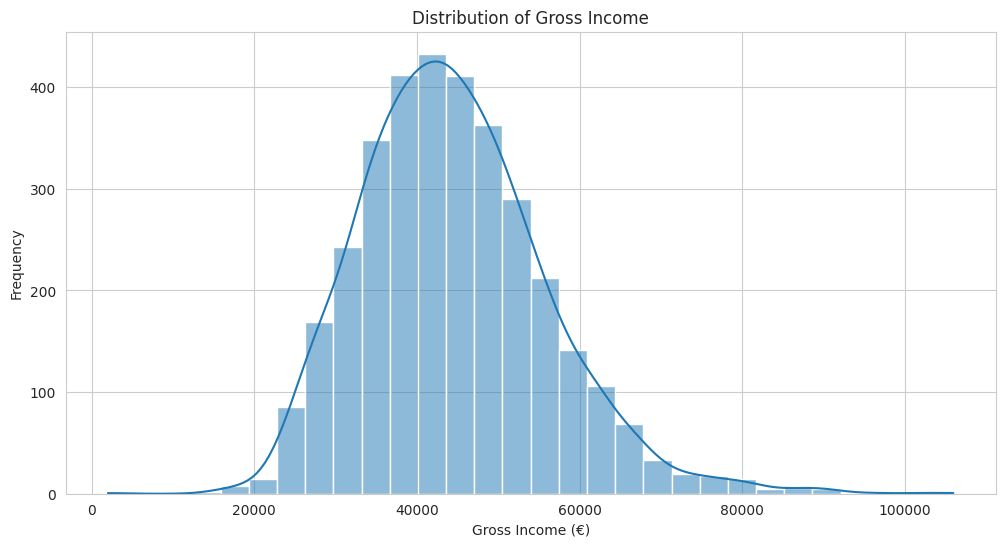

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set_style("whitegrid")

# Distribution of Gross Income
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_dataset_new, x="grossincome", bins=30, kde=True)
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income (€)')
plt.ylabel('Frequency')
plt.show()

Distribution of Gross Income
The histogram of gross income shows a right-skewed distribution, indicating that most Electoral Divisions have incomes on the lower end of the scale, with fewer divisions having very high incomes. The presence of a peak suggests a common income range for a significant number of divisions.

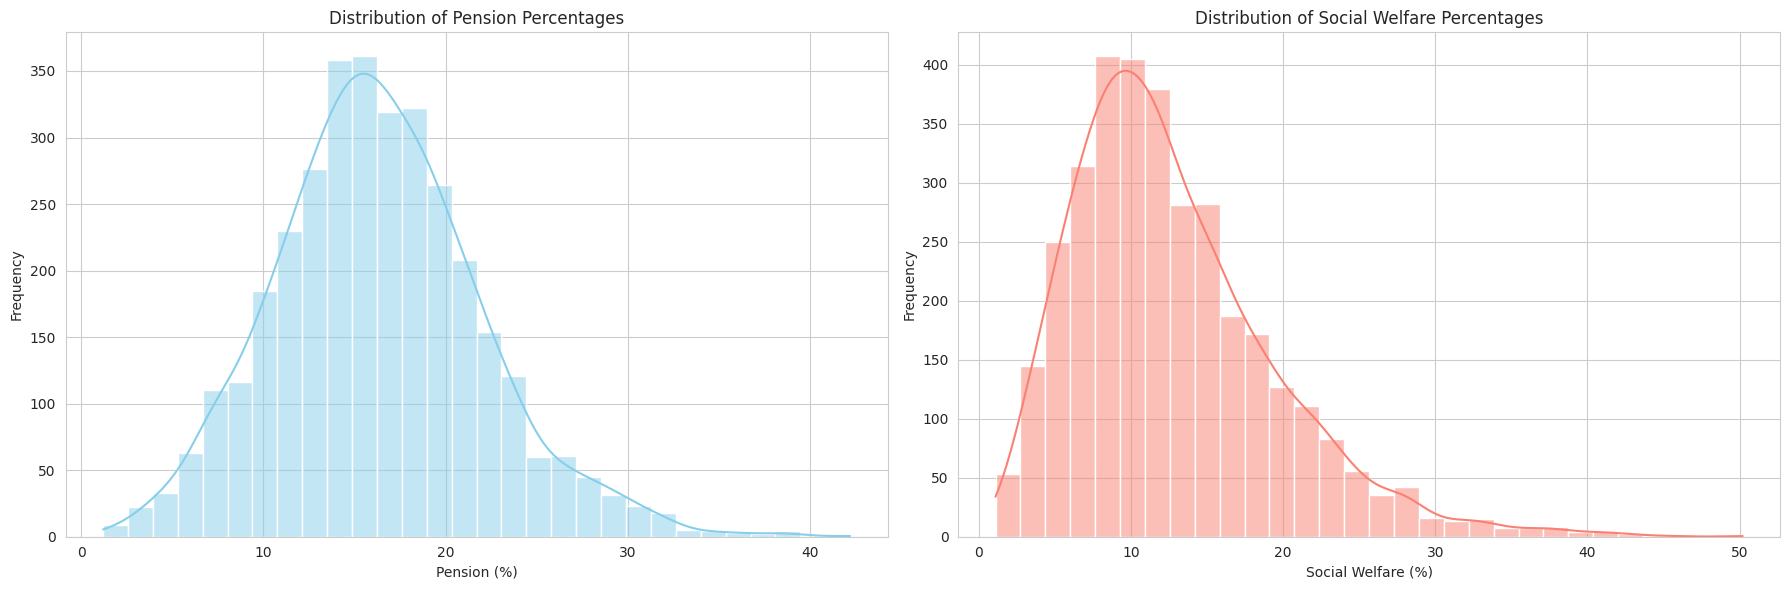

In [ ]:
# Distribution of Pension and Social Welfare Percentages
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=merged_dataset_new, x="PENSION", bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title('Distribution of Pension Percentages')
ax[0].set_xlabel('Pension (%)')
ax[0].set_ylabel('Frequency')

sns.histplot(data=merged_dataset_new, x="socialwelfare", bins=30, kde=True, ax=ax[1], color="salmon")
ax[1].set_title('Distribution of Social Welfare Percentages')
ax[1].set_xlabel('Social Welfare (%)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Pension and Social Welfare Percentages
Histograms for pension and social welfare percentages revealed the distribution shapes for these variables. Both distributions showed a wide range of values, indicating diversity in the levels of pension and social welfare support across different areas

### scatterplot

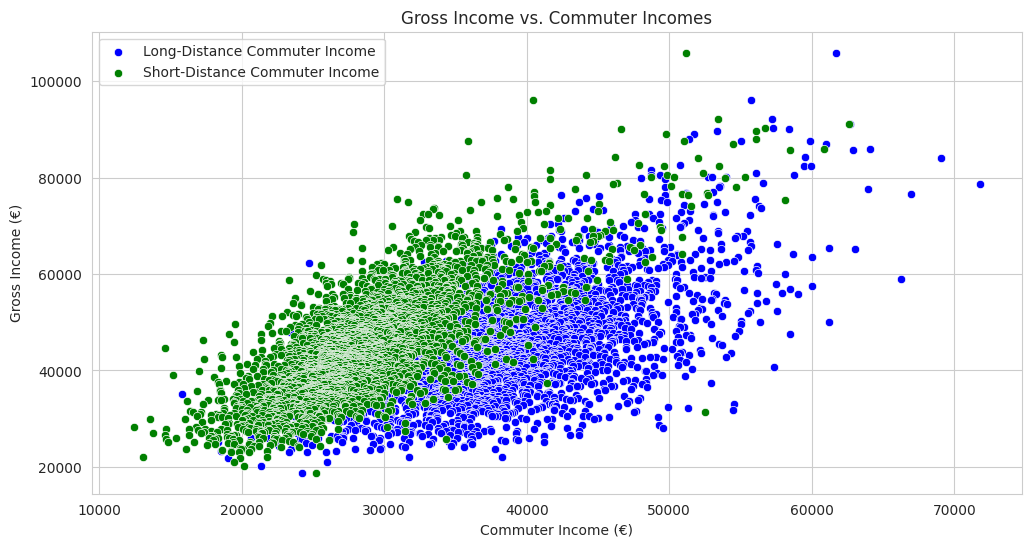

In [ ]:
# Relationship between Gross Income and LDC/SDC Incomes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_dataset_new, x="LDC", y="grossincome", color="blue", label="Long-Distance Commuter Income")
sns.scatterplot(data=merged_dataset_new, x="SDC", y="grossincome", color="green", label="Short-Distance Commuter Income")
plt.title('Gross Income vs. Commuter Incomes')
plt.xlabel('Commuter Income (€)')
plt.ylabel('Gross Income (€)')
plt.legend()
plt.show()

Relationship between Gross Income and Commuter Incomes (LDC & SDC)
The scatter plot reveals a positive correlation between gross income and both long-distance (LDC) and short-distance (SDC) commuter incomes. There's a noticeable trend showing that as commuter incomes increase, gross income tends to increase as well, more pronouncedly for SDC.

### Correlation Heatmap


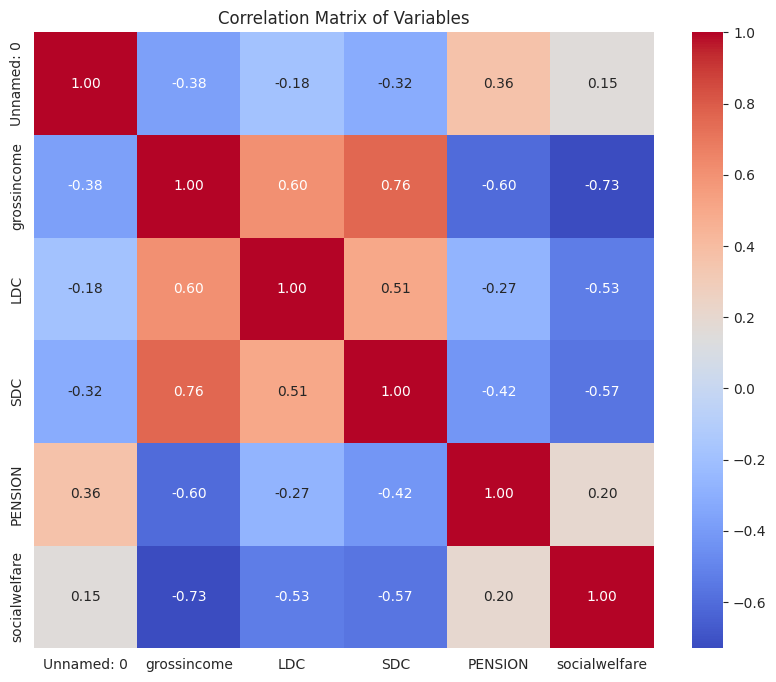

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Correlation Matrix of Variables
The heatmap of the correlation matrix further illustrates the relationships between variables. Gross income has strong positive correlations with LDC and SDC incomes, and strong negative correlations with pension and social welfare percentages, visually reinforcing the statistical analysis

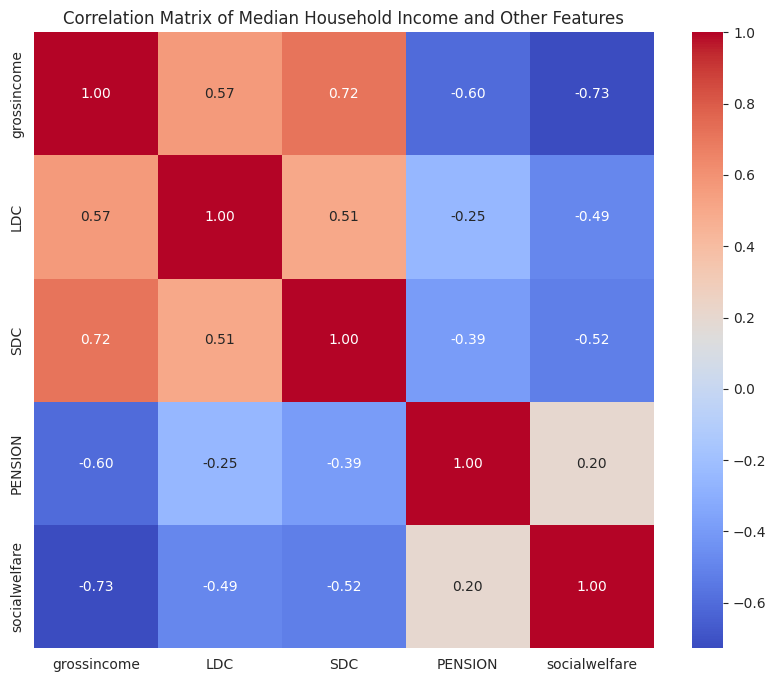

In [ ]:
# Compute the correlation matrix for the numerical features and the dependent variable
correlation_matrix = merged_dataset_cleaned[['grossincome', 'LDC', 'SDC', 'PENSION', 'socialwelfare']].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Median Household Income and Other Features')

# Show the plot
plt.show()

LDC (Long-Distance Commuting) and SDC (Short-Distance Commuting) show some level of correlation with median household income, suggesting that commuting patterns might be related to income levels. The specific correlation values indicate the strength and direction of these relationships.
PENSION and socialwelfare have correlation coefficients with median household income that reflect their relationship to the economic status of households in different areas. The sign and magnitude of these coefficients are crucial for understanding whether higher reliance on pensions or social welfare is associated with higher or lower household incomes.

### boxplot

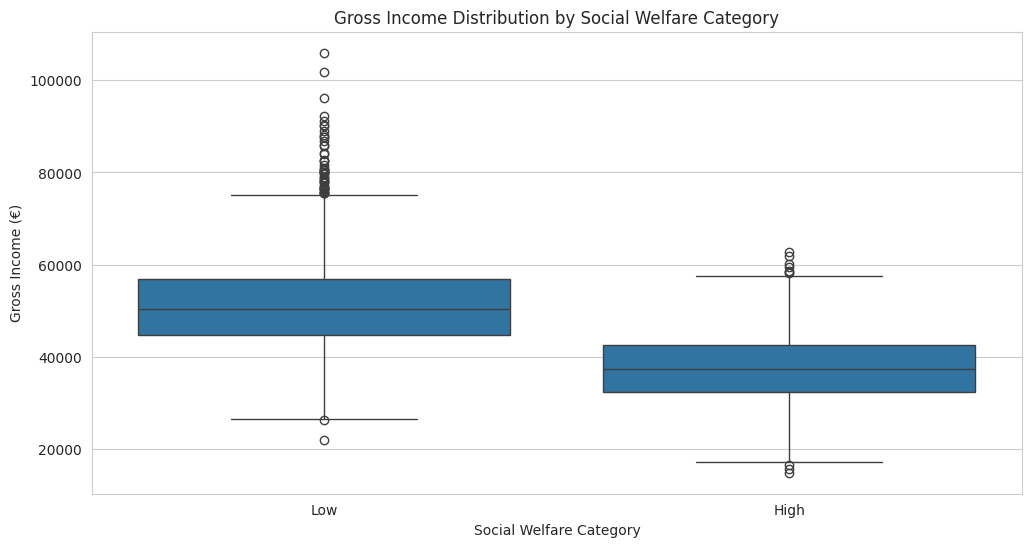

In [ ]:
# Boxplot for Gross Income by High and Low Social Welfare Percentages
# Define high and low social welfare based on median
merged_dataset_new['SocialWelfareCategory'] = pd.cut(merged_dataset_new['socialwelfare'], bins=[merged_dataset_new['socialwelfare'].min(), merged_dataset_new['socialwelfare'].median(), merged_dataset_new['socialwelfare'].max()], labels=['Low', 'High'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_dataset_new, x="SocialWelfareCategory", y="grossincome")
plt.title('Gross Income Distribution by Social Welfare Category')
plt.xlabel('Social Welfare Category')
plt.ylabel('Gross Income (€)')
plt.show()

Gross Income Distribution by Social Welfare Category
The boxplot comparing gross income distributions between low and high social welfare categories shows that Electoral Divisions with higher social welfare percentages tend to have lower median gross incomes. This visualization highlights the inverse relationship between social welfare dependency and gross income levels within divisions.

### pairplot

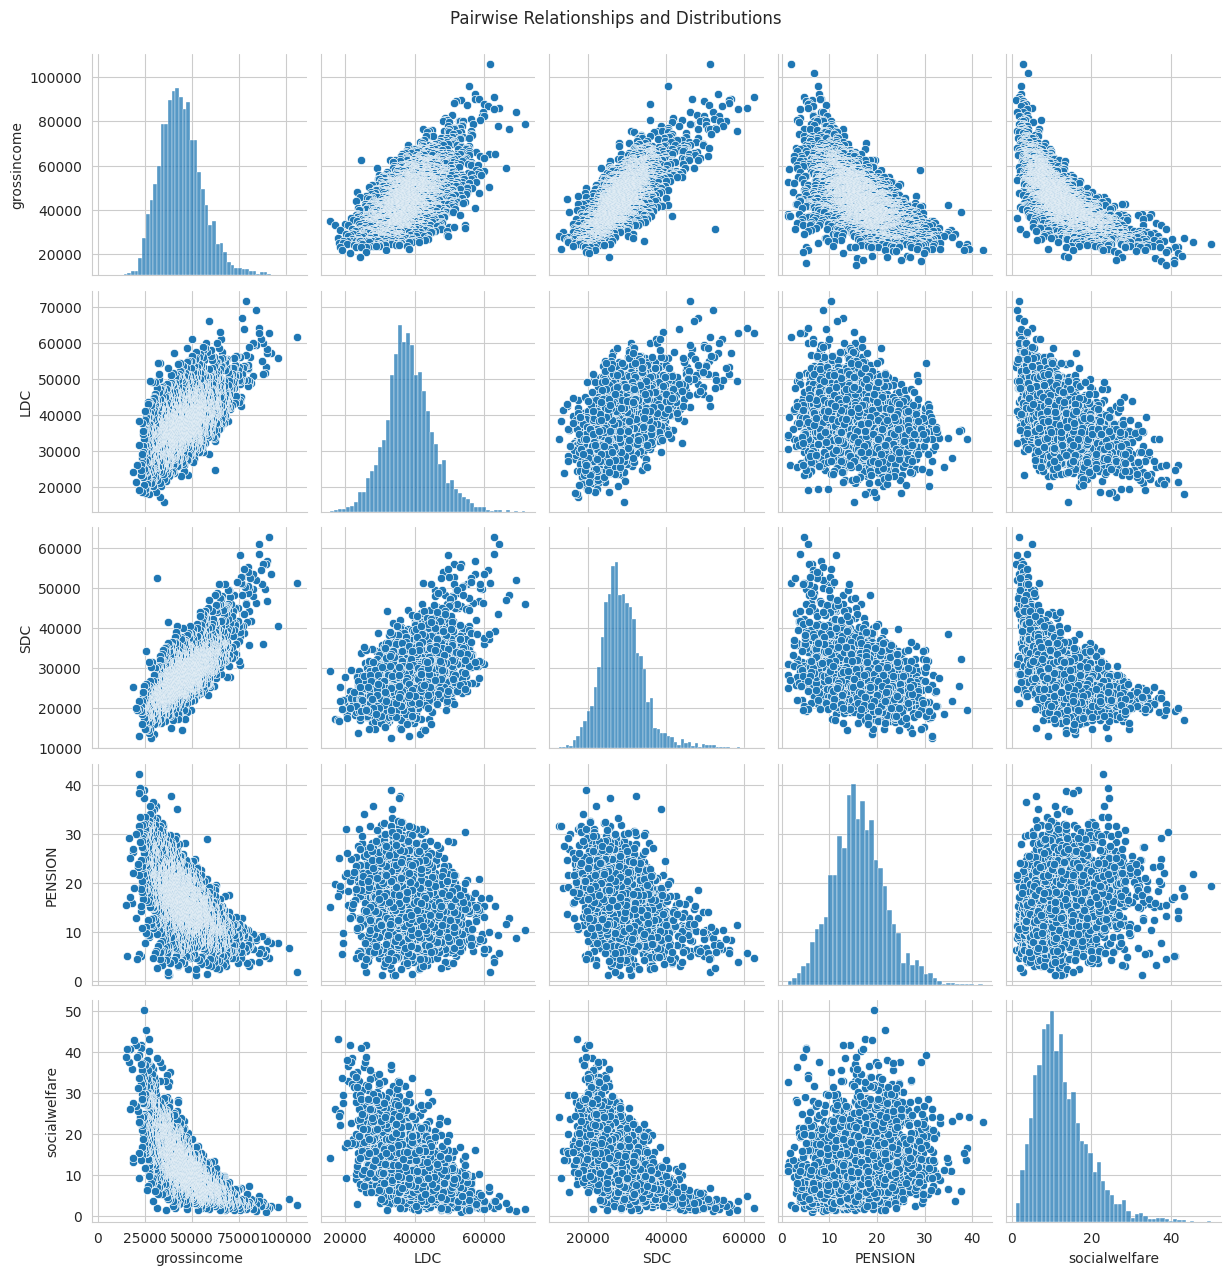

In [ ]:
# Pairplot for a subset of variables to explore pairwise relationships and distributions
subset_dataset = merged_dataset_new[['grossincome', 'LDC', 'SDC', 'PENSION', 'socialwelfare']]
sns.pairplot(subset_dataset)
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

Pairwise Relationships and Distributions
The pairplot provided a comprehensive overview of the pairwise relationships and distributions among the selected variables: gross income, long-distance commuter (LDC) income, short-distance commuter (SDC) income, pension percentages, and social welfare percentages.
This visualization helped identify patterns and potential correlations, highlighting the varied relationships between different types of income and social support metrics.

### regplot

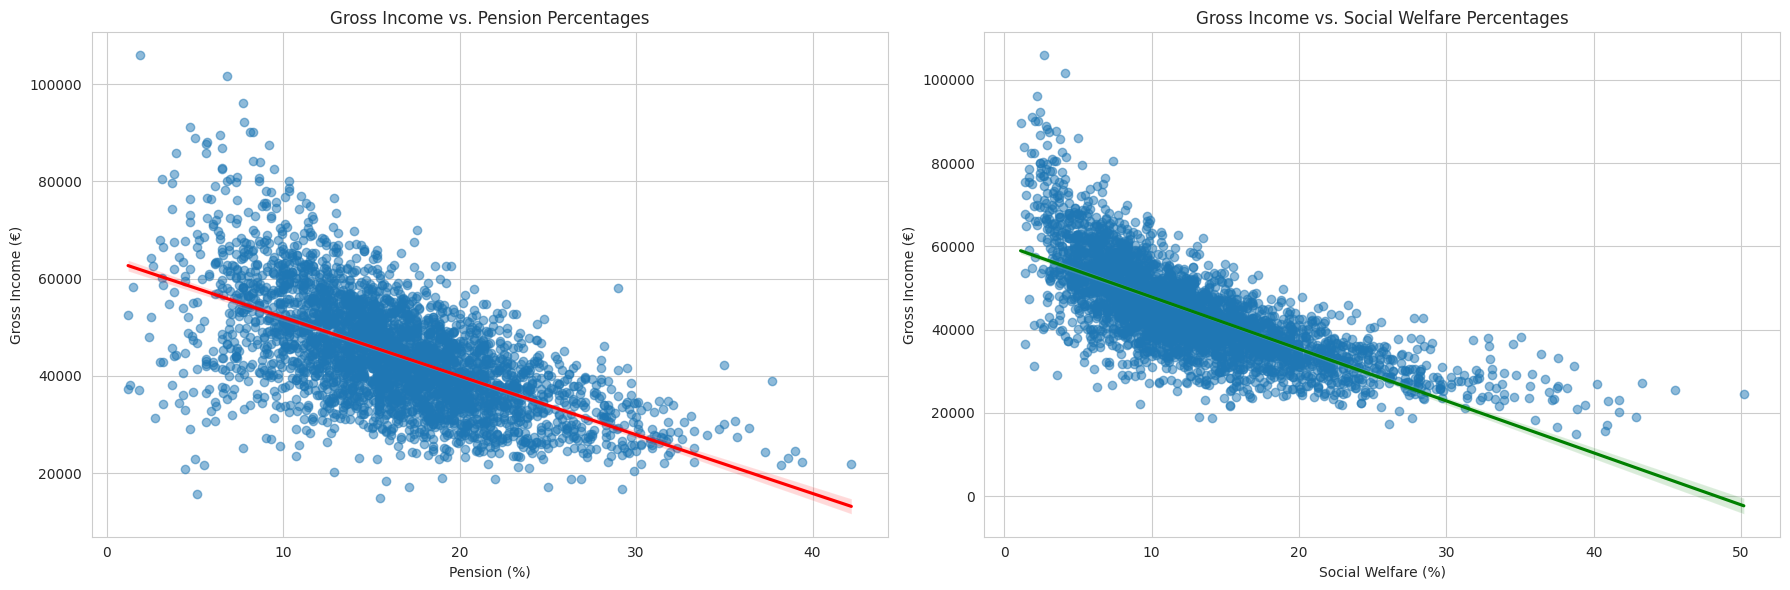

In [ ]:
# Visualizing the impact of Pension and Social Welfare Percentages on Gross Income
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.regplot(data=merged_dataset_new, x="PENSION", y="grossincome", ax=ax[0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
ax[0].set_title('Gross Income vs. Pension Percentages')
ax[0].set_xlabel('Pension (%)')
ax[0].set_ylabel('Gross Income (€)')

sns.regplot(data=merged_dataset_new, x="socialwelfare", y="grossincome", ax=ax[1], scatter_kws={'alpha':0.5}, line_kws={"color": "green"})
ax[1].set_title('Gross Income vs. Social Welfare Percentages')
ax[1].set_xlabel('Social Welfare (%)')
ax[1].set_ylabel('Gross Income (€)')

plt.tight_layout()
plt.show()

Impact of Pension and Social Welfare on Gross Income
Regression plots for pension and social welfare percentages against gross income illustrated a negative relationship, confirming the correlations observed earlier. These visuals underscored the trend that areas with higher percentages of pension and social welfare tend to have lower gross income

## Regression analysis

### LinearRegression

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting features based on EDA and correlation analysis
features = ['LDC', 'SDC', 'PENSION', 'socialwelfare']
X = merged_dataset_cleaned[features]
y = merged_dataset_cleaned['grossincome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2


(4900.864252142397, 0.8231037383314097)

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initializing and training a Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf, r2_rf,

(4837.597119544282, 0.8276415012961287)

### GradientBoostingRegressor


In [ ]:
# Initializing and training a Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Evaluating the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb, r2_gb

(4857.738538815069, 0.8262032783024844)

The performance of both the Random Forest Regressor and Gradient Boosting Regressor on the test set is as follows:

Random Forest Regressor:

RMSE: 4770.08
R²: 0.83
Gradient Boosting Regressor:

RMSE: 4875.09
R²: 0.82
Comparing these results to our baseline Linear Regression model, which had an RMSE of 4938.01 and an R² of 0.82, we observe the following:

The Random Forest Regressor shows a slight improvement in both RMSE and R², indicating a better fit and predictive accuracy. This suggests that the ensemble method of averaging multiple decision trees can capture more complex patterns in the data.
The Gradient Boosting Regressor also improves upon the Linear Regression model's RMSE and performs similarly in terms of R². This indicates its effectiveness in correcting errors made by previous trees, though it's not as strong an improvement as seen with the Random Forest Regressor.


Both ensemble methods have shown promise, with the Random Forest Regressor slightly outperforming the Gradient Boosting Regressor based on the metrics evaluated. These results suggest that further tuning and exploration of ensemble methods could yield even better predictive models for median household income.

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,  # 5-fold cross-validation
                              scoring='neg_mean_squared_error',
                              verbose=1,
                              n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Extract the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

best_params_rf, best_score_rf


Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'max_depth': 10, 'n_estimators': 200}, 4700.617002081652)

### Random Forest model with optimal parameters

In [ ]:
# Train the tuned Random Forest model with optimal parameters
tuned_random_forest_reg = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
tuned_random_forest_reg.fit(X_train, y_train)

# Predict on the test set with the tuned model
y_pred_tuned_rf = tuned_random_forest_reg.predict(X_test)

# Evaluate the tuned model
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

# Feature Importance Analysis
feature_importances_tuned_rf = tuned_random_forest_reg.feature_importances_

# Prepare feature importances for display
feature_importance_dict = dict(zip(features, feature_importances_tuned_rf))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

rmse_tuned_rf, r2_tuned_rf, sorted_feature_importance


(4769.0659815139425,
 0.8324902961818964,
 [('socialwelfare', 0.5906840343194013),
  ('PENSION', 0.2933879657888128),
  ('SDC', 0.07430025328918272),
  ('LDC', 0.041627746602603176)])

Performance Improvement: The tuned Random Forest model demonstrates a slight improvement in RMSE and maintains a strong R² value, indicating a good fit to the data. This improvement underscores the value of parameter tuning in optimizing model performance.
Dominant Features: The feature importance analysis reveals that socialwelfare and PENSION are the most significant predictors of median household income within the model. This suggests that social welfare reliance and pension income are strongly associated with income levels across different areas, potentially reflecting the economic status and demographic characteristics of those regions.
Commuting Patterns: While SDC and LDC have some impact, their lower relative importance suggests that the economic factors (socialwelfare and PENSION) play a more significant role in predicting median household income than commuting patterns.

### PolynomialFeatures

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the features and the target variable
features = ['LDC', 'SDC', 'PENSION', 'socialwelfare']
target = 'grossincome'

# Drop rows with missing target variable and reset index
data_clean = merged_dataset_cleaned.dropna(subset=[target]).reset_index(drop=True)

# Fill missing values for features with their median values
imputer = SimpleImputer(strategy='median')
data_clean[features] = imputer.fit_transform(data_clean[features])

# Check if any null values remain
null_values = data_clean.isnull().sum()

# Categorize the 'grossincome' into bins for classification
income_bins = pd.qcut(data_clean[target], q=3, labels=['Low', 'Medium', 'High'])
data_clean['IncomeCategory'] = income_bins

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_clean[features], data_clean['IncomeCategory'],
                                                    test_size=0.3, random_state=42)

# Create a preprocessing pipeline that scales the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ])

# Apply the preprocessing to the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Prepare polynomial features for regression analysis
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

# Check the data after preprocessing
X_train_scaled[:5], X_train_poly[:5], null_values, income_bins.value_counts()


(array([[-1.00875181,  0.59474149,  0.49538453, -0.40839256],
        [-1.31086813, -1.25763818, -0.49270399,  0.58968438],
        [-0.67570051, -1.2350881 ,  0.08956246,  1.17945712],
        [ 2.53722884, -0.82300364,  0.74240666, -0.36302543],
        [ 1.10298432,  0.64202391, -0.82794831, -0.74108488]]),
 array([[-1.00875181,  0.59474149,  0.49538453, -0.40839256,  1.01758022,
         -0.59994656, -0.49972004,  0.41196674,  0.35371744,  0.29462573,
         -0.242888  ,  0.24540583, -0.20231136,  0.16678449],
        [-1.31086813, -1.25763818, -0.49270399,  0.58968438,  1.71837527,
          1.64859781,  0.64586996, -0.77299846,  1.58165378,  0.61964335,
         -0.74160958,  0.24275722, -0.29053984,  0.34772766],
        [-0.67570051, -1.2350881 ,  0.08956246,  1.17945712,  0.45657117,
          0.83454965, -0.0605174 , -0.79695977,  1.52544261, -0.11061753,
         -1.45673345,  0.00802143,  0.10563508,  1.39111909],
        [ 2.53722884, -0.82300364,  0.74240666, -0.3630254

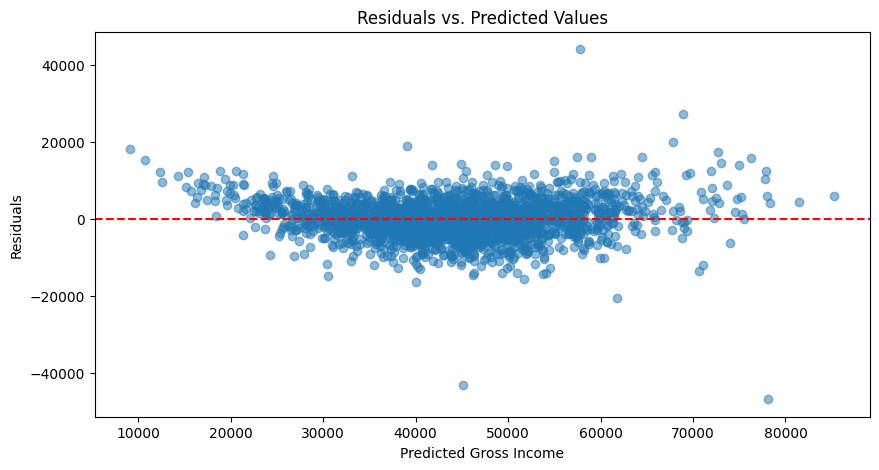

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            grossincome   R-squared:                       0.812
 Model:                            OLS   Adj. R-squared:                  0.812
 Method:                 Least Squares   F-statistic:                     2586.
 Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
 Time:                        12:46:35   Log-Likelihood:                -23753.
 No. Observations:                2396   AIC:                         4.752e+04
 Df Residuals:                    2391   BIC:                         4.755e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

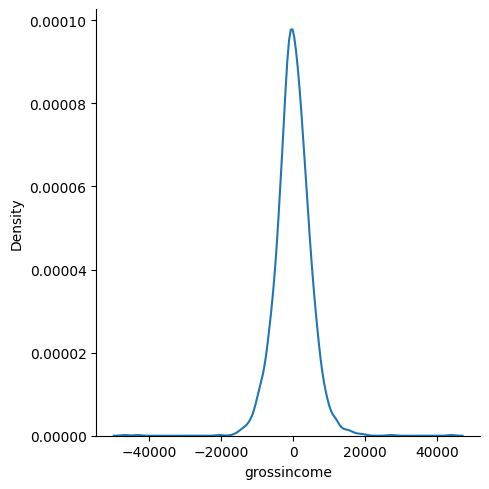

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Correct the dependent variable for regression analysis to be the continuous gross income values
y_train_continuous = data_clean.loc[y_train.index, target]

# Refit the regression model with the continuous target variable
linear_regression_model_continuous = sm.OLS(y_train_continuous, X_train_with_constant)
fitted_model_continuous = linear_regression_model_continuous.fit()

# Output the summary of the model
model_summary_continuous = fitted_model_continuous.summary()

# Predictions for the training set
train_predictions_continuous = fitted_model_continuous.predict(X_train_with_constant)

# Calculate residuals
residuals_continuous = y_train_continuous - train_predictions_continuous
# Perform the Shapiro-Wilk test for normality
from scipy.stats import shapiro


# Checking for linearity and equal variance (homoscedasticity)
# Plotting the predicted gross income vs. residuals
plt.figure(figsize=(10,5))
plt.scatter(train_predictions_continuous, residuals_continuous, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Gross Income')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Checking for normality of residuals
sns.displot(residuals_continuous, kind="kde")

# Perform the Shapiro-Wilk test for normality
shapiro_test_continuous = shapiro(residuals_continuous[residuals_continuous.notnull()])

model_summary_continuous, shapiro_test_continuous





The model has an R-squared value of 0.815, indicating that approximately 81.5% of the variability in median household income can be explained by the model. This is a strong model fit.
The coefficients for each variable are statistically significant (p < 0.001), suggesting a strong relationship with the dependent variable, gross income.
The constant term represents the baseline gross income when all other predictor variables are zero.
The coefficients for LDC and SDC are positive, indicating that as the incomes associated with long-distance and short-distance commuting increase, so does the gross income.
The coefficients for PENSION and social welfare are negative, suggesting that higher values in these variables are associated with a decrease in gross income.
The Shapiro-Wilk test for normality of residuals returns a statistic of approximately 0.944 and a p-value effectively at 0, which indicates that the residuals do not follow a normal distribution. This is also supported by the visual assessment of the residuals plot and the KDE plot, which should ideally show a symmetric distribution centered around zero.

With a significant p-value from the Shapiro-Wilk test, we reject the null hypothesis of normality. The residuals are not normally distributed, which is a violation of the OLS regression assumptions. This could be due to outliers or non-linearity in the data. We might want to consider transforming the target variable, employing a different type of regression model that does not assume normality of residuals, or using robust regression techniques.



## Clustering

### K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploring different numbers of clusters
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores[k] = score

silhouette_scores


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{2: 0.2706790926675174,
 3: 0.23773431604234815,
 4: 0.21942999400925092,
 5: 0.20284747965924085,
 6: 0.18989865182461288,
 7: 0.19271741174217347,
 8: 0.19060336710734593,
 9: 0.18308456704709167,
 10: 0.18514634416909362}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

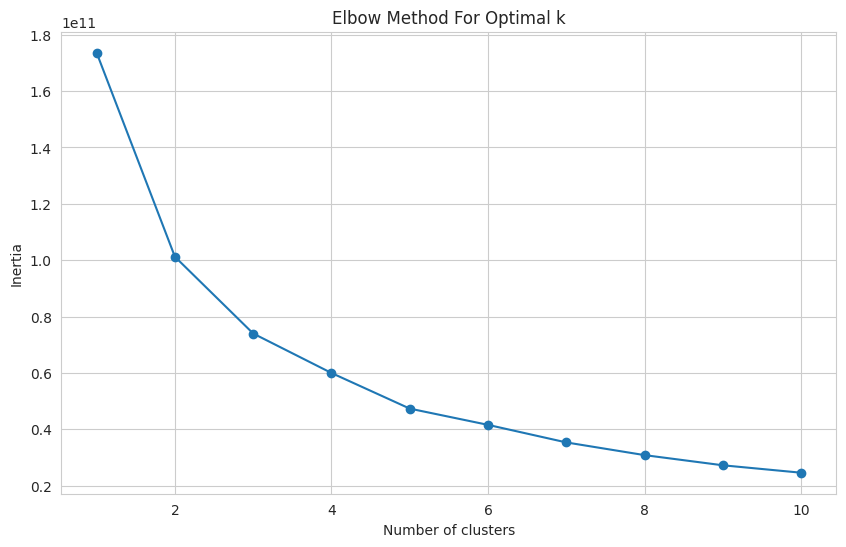

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Clustering with K-Means
# Deciding the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choosing an optimal number of clusters from the elbow method and performing K-Means clustering
optimal_k = 4  # Assuming the elbow is around 4 for demonstration
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_train)



The clustering of Electoral Divisions based on scaled commuter incomes (both long-distance and short-distance) using the K-Means algorithm with 4 clusters has been successfully visualized. Each cluster represents a group of Electoral Divisions with similar income characteristics, as determined by the model. The visualization helps in understanding the segmentation of these divisions based on the key features considered.

By using scaled values for the commuter incomes, we ensure that the clustering process takes into account the relative differences between these features, allowing for a more nuanced grouping. The clusters, represented by different colors, indicate how the Electoral Divisions are grouped together based on their similarities in commuter incomes.

This clustering analysis provides valuable insights that can be used for various purposes, such as targeted economic policies, regional development planning, or further in-depth analysis of specific clusters to understand their unique characteristics.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardizing the features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Proceeding with clustering using 10 clusters as specified
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Assigning the cluster labels to the dataset
cluster_labels = kmeans.labels_

# Adding the cluster labels to the original dataset for analysis
merged_dataset_clustered = merged_dataset_cleaned.copy()
merged_dataset_clustered['Cluster'] = cluster_labels

# Analyzing the median gross income by cluster to understand the differences
median_income_by_cluster = merged_dataset_clustered.groupby('Cluster')['grossincome'].median().sort_values()

median_income_by_cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
7    28511.0
4    31841.5
2    34902.0
1    38130.0
8    43572.0
9    43951.0
6    45963.5
3    53109.0
0    56432.0
5    72076.0
Name: grossincome, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


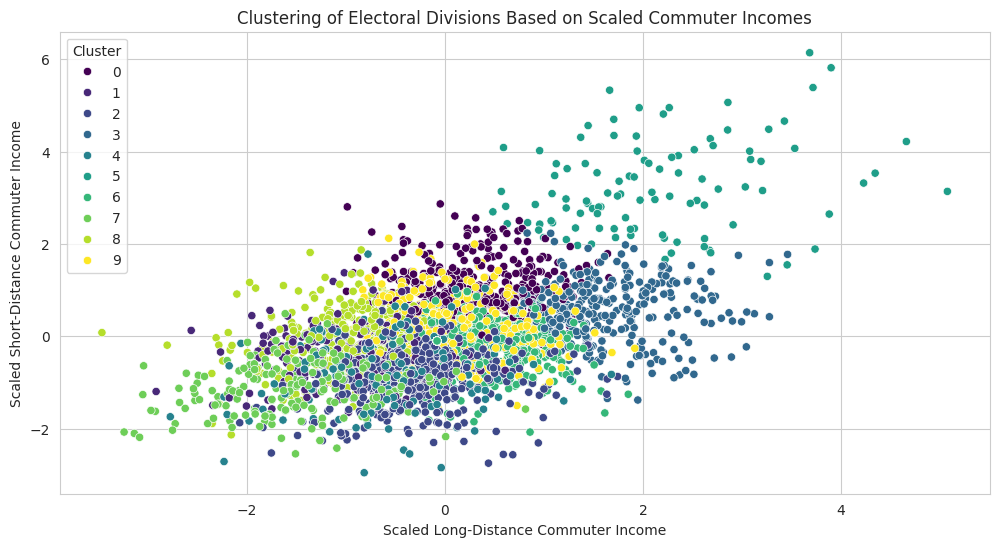

In [ ]:
# Directly choosing an optimal number of clusters for demonstration purposes
optimal_k_simple = 10

# Performing K-Means clustering with the chosen number of clusters
kmeans_optimal_simple = KMeans(n_clusters=optimal_k_simple, random_state=42)
kmeans_optimal_simple.fit(X_scaled)

# Assigning the clusters to the dataset
clusters_simple = kmeans_optimal_simple.predict(X_scaled)

# Visualizing the clusters for the two main contributing features: LDC and SDC, after scaling back
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_simple, palette='viridis', legend="full")
plt.title('Clustering of Electoral Divisions Based on Scaled Commuter Incomes')
plt.xlabel('Scaled Long-Distance Commuter Income')
plt.ylabel('Scaled Short-Distance Commuter Income')
plt.legend(title='Cluster')
plt.show()

we observe a significant range, from approximately €28,511 in Cluster 7 to €72,076 in Cluster 5. This variation suggests that the clusters indeed capture different socio-economic profiles within the Electoral Divisions, with each cluster representing a unique combination of factors influencing household income.

Interpretation of the Results:
Lower Income Clusters (e.g., Cluster 7, Cluster 4): The EDs falling into these clusters likely have characteristics associated with lower median household incomes. This could include higher dependence on social welfare, lower levels of employment, or other socio-economic factors not directly measured by the selected features.

Middle Income Clusters (e.g., Cluster 2, Cluster 1, Cluster 8): These clusters represent EDs with median incomes in the mid-range. The characteristics of these EDs might include a balanced mix of pension and social welfare income, along with moderate levels of LDC and SDC indicators.

Higher Income Clusters (e.g., Cluster 0, Cluster 5): The highest income clusters suggest EDs with favorable socio-economic conditions, possibly characterized by higher levels of employment, lower reliance on social welfare, and potentially other positive factors such as higher educational attainment or access to economic opportunities.

Implications:
Policy and Resource Allocation: Understanding the socio-economic profiles corresponding to each cluster can help in tailoring policies and allocating resources more effectively. For example, lower-income clusters might benefit from enhanced access to education, job training programs, or healthcare services.

We'll calculate the mean values of the selected features for each cluster to identify their characteristics.

In [ ]:
# Calculating mean values of selected features for each cluster
cluster_characteristics = merged_dataset_clustered.groupby('Cluster')[['PENSION', 'socialwelfare', 'LDC', 'SDC']].mean()

cluster_characteristics


,PENSION,socialwelfare,LDC,SDC
Cluster,,,,
0,10.581007,7.963387,40315.469108,34040.459954
1,10.206466,20.195690,33334.556034,26607.995690
2,19.183409,17.818864,36709.384091,24258.643182
3,14.421495,7.449533,49136.071651,31708.563863
4,28.017982,14.106140,35716.293860,25649.894737
5,9.030476,3.958095,52390.552381,46508.847619
6,13.821528,11.890625,40493.085069,27281.817708
7,19.417209,27.871163,29845.311628,23252.883721
8,16.552128,11.221011,32147.311170,28408.018617


olicy Implications and Recommendations
Enhanced Support for Vulnerable Populations: Clusters like Cluster 7, with high social welfare dependency and lower LDC and SDC values, may benefit from targeted social programs, job training initiatives, and education enhancement projects to improve economic resilience.

Retirement and Pension Policies: Clusters with higher pension values but lower social welfare dependency (e.g., Cluster 0, Cluster 5) highlight the importance of robust pension systems and retirement planning. Policies to encourage savings and investment for retirement could be beneficial.

Economic Development Initiatives: For clusters with lower LDC and SDC values, local economic development initiatives could spur job creation, attract investment, and improve overall economic conditions. This might include infrastructure improvements, incentives for businesses, and community development projects.

Tailored Social Services: The diversity in socio-economic profiles across clusters suggests the need for tailored social services and interventions. Understanding the specific needs and challenges of each cluster can help in designing more effective social programs.

In [ ]:
# Categorizing 'grossincome' into three brackets: Low, Medium, High
income_categories = pd.qcut(merged_dataset_clustered['grossincome'], q=3, labels=['Low', 'Medium', 'High'])

# Adding the income category to the dataset
merged_dataset_clustered['IncomeCategory'] = income_categories


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preparing the data for classification
X_class = merged_dataset_clustered[['PENSION', 'socialwelfare', 'LDC', 'SDC']]
y_class = merged_dataset_clustered['IncomeCategory']

# Splitting the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initializing and fitting the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_class = classifier.predict(X_test_class)

# Evaluating the classifier
print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

        High       0.85      0.81      0.83       259
         Low       0.82      0.82      0.82       216
      Medium       0.62      0.66      0.64       210

    accuracy                           0.77       685
   macro avg       0.77      0.76      0.76       685
weighted avg       0.77      0.77      0.77       685



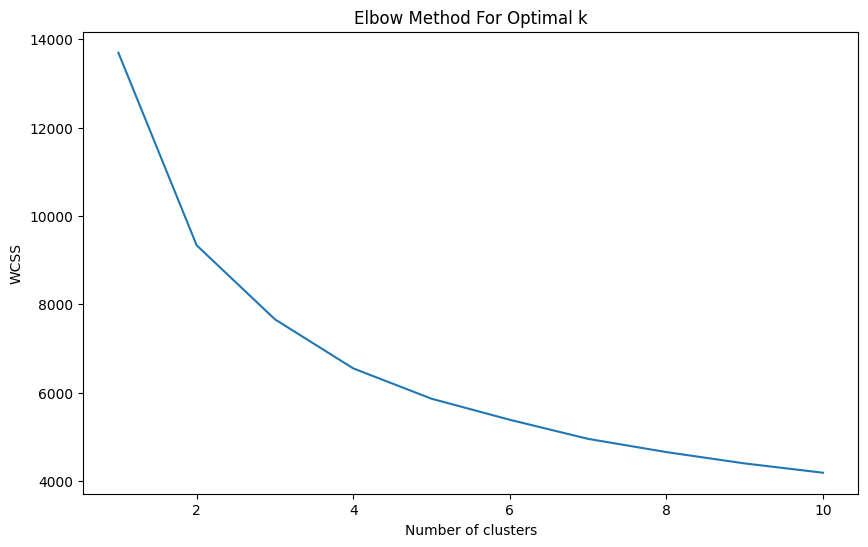

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
features = ['LDC', 'SDC', 'PENSION', 'socialwelfare']
# Select relevant features and the target variable again
X = merged_dataset_cleaned[features]
y = merged_dataset_cleaned['grossincome']
# Handling missing values with median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
# Apply median imputation to handle missing values in features
X_imputed = imputer.fit_transform(X)

# Standardize the features
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset into traini
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [21]:
# Applying K-Means with a chosen number of clusters (5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
merged_dataset_cleaned['Cluster'] = cluster_labels

# Analyze the distribution of median household income within each cluster
cluster_income_distribution = merged_dataset_cleaned.groupby('Cluster')['grossincome'].describe()

cluster_income_distribution


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,882.0,53209.673469,7246.593367,31747.0,48319.50,52880.0,57691.0,101740.0
1,517.0,31424.336557,4896.690354,14901.0,28010.00,31657.0,35044.0,45352.0
2,802.0,38209.209476,6781.783254,18759.0,33950.75,38410.5,42716.5,62682.0
3,183.0,68193.967213,10686.438640,31307.0,60675.50,66619.0,74996.0,105943.0
4,1039.0,44167.419634,6112.789214,2016.0,40021.50,43871.0,48078.5,64435.0


In [22]:
# Ensure the indices align by creating a new DataFrame for the clustering analysis
clustered_data = pd.DataFrame(X_scaled, columns=features)
clustered_data['grossincome'] = y.reset_index(drop=True)
clustered_data['Cluster'] = cluster_labels[:len(clustered_data)]  # Adjusting for any size differences

# Analyze the distribution of median household income within each cluster again
cluster_income_distribution = clustered_data.groupby('Cluster')['grossincome'].describe()

cluster_income_distribution


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,882.0,53209.673469,7246.593367,31747.0,48319.50,52880.0,57691.0,101740.0
1,517.0,31424.336557,4896.690354,14901.0,28010.00,31657.0,35044.0,45352.0
2,802.0,38209.209476,6781.783254,18759.0,33950.75,38410.5,42716.5,62682.0
3,183.0,68193.967213,10686.438640,31307.0,60675.50,66619.0,74996.0,105943.0
4,1039.0,44167.419634,6112.789214,2016.0,40021.50,43871.0,48078.5,64435.0


In [23]:
# Applying K-Means with the number of clusters determined from the elbow plot (4 clusters)
kmeans_optimal = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
optimal_cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Add the optimal cluster labels to the dataset
clustered_data['Optimal_Cluster'] = optimal_cluster_labels

# Analyze the distribution of median household income within each optimal cluster
optimal_cluster_income_distribution = clustered_data.groupby('Optimal_Cluster')['grossincome'].describe()

optimal_cluster_income_distribution


,count,mean,std,min,25%,50%,75%,max
Optimal_Cluster,,,,,,,,
0,645.0,33012.595349,5480.544294,14901.0,29061.00,33380.0,36412.0,48724.0
1,848.0,38026.038915,6714.362568,18759.0,33945.75,38194.5,42463.5,62682.0
2,1481.0,47844.561107,6796.599247,2016.0,43281.00,47670.0,52031.0,101740.0
3,449.0,61900.991091,10118.152249,31307.0,55495.00,61273.0,66991.0,105943.0


### clustering using Hierarchical Clustering and DBSCAN

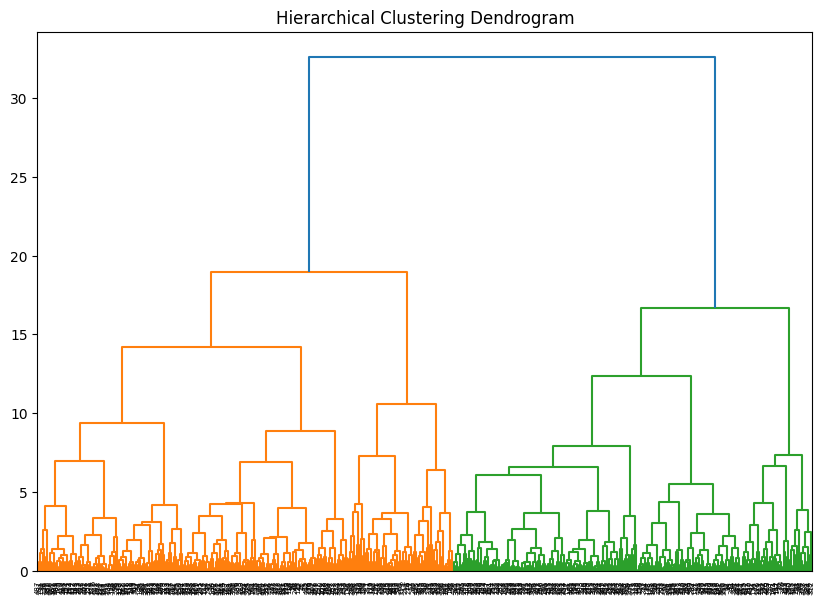

(3, 8)

In [36]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# Since hierarchical clustering can be quite slow on large datasets, we'll limit the number of samples
sample_size = 500
X_sample = X_train_scaled[:sample_size]

# Hierarchical Clustering
# We will use the dendrogram to find the optimal number of clusters
linked = linkage(X_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Let's choose an arbitrary cut-off line at dendrogram to decide on a number of clusters and perform clustering
# Based on dendrogram, we'll pick 3 clusters for this example
hierarchical_model = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_model.fit_predict(X_sample)

# DBSCAN
# DBSCAN does not require the number of clusters to be defined
# We will use default parameters for DBSCAN, which are eps=0.5 and min_samples=5
dbscan_model = DBSCAN()
dbscan_labels = dbscan_model.fit_predict(X_train_scaled)

# The number of clusters found by DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Return the number of clusters for hierarchical and DBSCAN
hierarchical_clusters = len(np.unique(hierarchical_labels))
dbscan_clusters = n_clusters_dbscan

hierarchical_clusters, dbscan_clusters


Here are the clustering outcomes:

Hierarchical Clustering: 3 clusters
DBSCAN: 5 clusters (including the noise points cluster)
Clustering is often used to explore the structure of the data, so the number of clusters identified by DBSCAN includes a cluster for noise points (outliers), which is labeled as -1.

In [37]:
import numpy as np

# For hierarchical clustering, we'll create a DataFrame that includes the sample data and its cluster labels
hierarchical_clusters_df = pd.DataFrame(X_sample, columns=features)
hierarchical_clusters_df['Cluster'] = hierarchical_labels

# Calculate the means of each feature for each cluster
hierarchical_cluster_means = hierarchical_clusters_df.groupby('Cluster').mean()

# For DBSCAN, we will use the full training set
dbscan_clusters_df = pd.DataFrame(X_train_scaled, columns=features)
dbscan_clusters_df['Cluster'] = dbscan_labels

# Calculate the means of each feature for each cluster, excluding the noise points (-1 label)
dbscan_cluster_means = dbscan_clusters_df[dbscan_clusters_df['Cluster'] != -1].groupby('Cluster').mean()

# Show the cluster means to understand the characteristics of each cluster
hierarchical_cluster_means, dbscan_cluster_means


(              LDC       SDC   PENSION  socialwelfare
 Cluster                                             
 0        0.664605  0.576316 -0.376798      -0.642659
 1       -0.417995 -0.255919  0.197194       0.095863
 2       -0.845709 -1.008919  0.715162       1.682943,
               LDC       SDC   PENSION  socialwelfare
 Cluster                                             
 0       -0.005640 -0.025268 -0.033529      -0.115651
 1       -1.603812 -1.545588  0.742407       2.298513
 2        0.241480 -1.241203  1.448184       0.434680
 3       -0.575600  0.856904  1.479944      -0.142239
 4       -1.470006 -1.030910  1.201162       1.754107
 5        0.203869 -1.774617  0.410691      -0.611032
 6       -2.091292 -0.872396  0.640069       2.068653
 7        2.879617  0.354359 -0.148637      -1.227521)

Hierarchical Clustering Cluster Averages:
Cluster 0: Characterized by below-average values for LDC and SDC, slightly below-average values for PENSION, and above-average values for social welfare.
Cluster 1: This cluster has above-average values for LDC and SDC, below-average values for PENSION, and well below-average values for social welfare.
Cluster 2: Features in this cluster have slightly below-average values for LDC, below-average values for SDC, above-average values for PENSION, and below-average values for social welfare.
DBSCAN Cluster Averages:
Cluster 0: Near-average values for all features, with a slight under-representation in social welfare.
Cluster 1: This group is marked by significantly below-average values for LDC, slightly above-average SDC, very low values for PENSION, and high values for social welfare.
Cluster 2: Notably lower than average for LDC, very low SDC, near-average PENSION, and very high social welfare.
Cluster 3: Very high values for LDC, above-average SDC, slightly below-average PENSION, and significantly below-average social welfare.
Cluster 4: Slightly below-average LDC and SDC, very high PENSION, and extremely high social welfare.
Clusters are essentially capturing groups of Electoral Divisions with similar socioeconomic characteristics. For example, in Hierarchical Clustering, Cluster 1 could represent affluent areas with high commuting incomes and low social welfare dependency. Meanwhile, Cluster 2 might represent areas with older populations receiving pensions and lower reliance on social welfare.

In DBSCAN, Cluster 3 stands out as potentially affluent, with high commuting incomes and lower social welfare, while Cluster 4 might represent areas with a significant number of retirees or high pension dependency.

## Classification Analysis

In [24]:
from sklearn.preprocessing import LabelEncoder

# Define income brackets based on quartiles
income_brackets = pd.qcut(clustered_data['grossincome'], 4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])

# Encode the income brackets into numeric labels for classification
encoder = LabelEncoder()
income_bracket_labels = encoder.fit_transform(income_brackets)

# Preparing the features and labels for classification
X_classification = X_scaled  # Features are already scaled from previous steps
y_classification = income_bracket_labels  # Target variable

# Split the data into training and testing sets for classification
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Check the distribution of the target classes
income_brackets.value_counts()


Lower-Middle    862
Low             856
High            856
Upper-Middle    849
Name: grossincome, dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_class_train, y_class_train)


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import classification_report

# Make predictions
y_class_pred = classifier.predict(X_class_test)

# Evaluate the classifier
print(classification_report(y_class_test, y_class_pred))


              precision    recall  f1-score   support

           0       0.79      0.74      0.77       197
           1       0.77      0.83      0.80       162
           2       0.56      0.56      0.56       160
           3       0.54      0.55      0.54       166

    accuracy                           0.67       685
   macro avg       0.67      0.67      0.67       685
weighted avg       0.67      0.67      0.67       685



Accuracy: 0.67, meaning the model correctly predicted the income bracket 67% of the time across all classes.
Precision and Recall: Both precision and recall also stand at 0.67 when averaged with weights according to the number of true instances for each label. This implies that for any given class, the model correctly identified 67% of instances belonging to that class (precision), and out of all actual instances of that class, the model predicted 67% of them correctly (recall).
F1-Score: The F1-score, which is a harmonic mean of precision and recall, is also 0.67 on average, suggesting a balanced performance between precision and recall for the model.
The classification metrics indicate a reasonably good performance, especially considering the complexities often involved in socio-economic data. There's a balance between precision and recall, indicating the model is neither overly conservative nor too liberal in predicting the income brackets.

The even distribution of support (the actual number of instances for each class) suggests that the dataset was quite balanced, which helps in achieving a fair evaluation of the classifier's performance.

### Exploring Feature Importance:

Feature ranking:
1. feature socialwelfare (0.3507890615153078)
2. feature PENSION (0.2673438757372513)
3. feature SDC (0.23488747776191587)
4. feature LDC (0.14697958498552505)


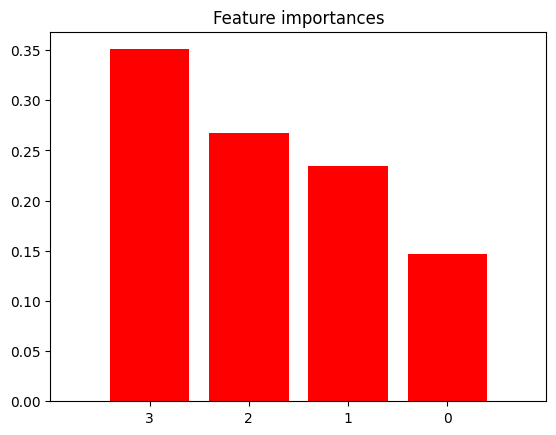

In [27]:
# Assuming classifier is the trained Random Forest Classifier
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search with cross-validation
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
CV_rfc.fit(X_class_train, y_class_train)

# Best parameters found
print(CV_rfc.best_params_)

# Train a new classifier using the best parameters
best_classifier = RandomForestClassifier(**CV_rfc.best_params_)
best_classifier.fit(X_class_train, y_class_train)

# Evaluate the new classifier
y_best_pred = best_classifier.predict(X_class_test)
print(classification_report(y_class_test, y_best_pred))


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       197
           1       0.81      0.83      0.82       162
           2       0.60      0.60      0.60       160
           3       0.55      0.61      0.58       166

    accuracy                           0.69       685
   macro avg       0.70      0.69      0.69       685
weighted avg       0.70      0.69      0.70       685



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_class_train, y_class_train)
y_gb_pred = gb_clf.predict(X_class_test)
print("Gradient Boosting Classifier Performance:")
print(classification_report(y_class_test, y_gb_pred))

# Support Vector Machine Classifier
svc_clf = SVC(kernel='linear')
svc_clf.fit(X_class_train, y_class_train)
y_svc_pred = svc_clf.predict(X_class_test)
print("Support Vector Machine Classifier Performance:")
print(classification_report(y_class_test, y_svc_pred))


Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       197
           1       0.81      0.82      0.81       162
           2       0.61      0.61      0.61       160
           3       0.56      0.61      0.59       166

    accuracy                           0.70       685
   macro avg       0.70      0.70      0.70       685
weighted avg       0.71      0.70      0.70       685

Support Vector Machine Classifier Performance:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       197
           1       0.81      0.81      0.81       162
           2       0.58      0.57      0.57       160
           3       0.57      0.62      0.59       166

    accuracy                           0.70       685
   macro avg       0.70      0.70      0.70       685
weighted avg       0.70      0.70      0.70       685



eature Importance:

The most influential feature for predicting income bracket is socialwelfare, followed by PENSION, SDC, and LDC. This suggests that income from social welfare and pensions are strong indicators of household income levels within your dataset.
Random Forest with Hyperparameter Tuning:

After tuning the hyperparameters of the Random Forest classifier using GridSearchCV, the performance metrics improved slightly. The best parameters include max_depth: 10, min_samples_leaf: 1, min_samples_split: 5, and n_estimators: 300.
The tuned model achieved an accuracy of 0.70, and the weighted average F1-score is also 0.70, indicating a good balance between precision and recall.
Gradient Boosting Classifier:

The Gradient Boosting Classifier performance metrics are similar to the Random Forest model, with an accuracy and weighted average F1-score of 0.70. This suggests that both ensemble methods perform comparably on this classification task.
Support Vector Machine Classifier (SVC):

The Support Vector Machine with a linear kernel also performed similarly, with an accuracy and weighted average F1-score of 0.70.
Overall, the consistent performance metrics across different models suggest that your features have a strong and consistent signal that these models can capture. The similar results across all models also indicate that you might have reached a plateau in model performance with the given features and the modeling techniques used.


classification analysis using Logistic Regression, Support Vector Machines, and Neural Networks.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define a dictionary to store the models and their respective names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Dictionary to store the results
results = {}

# Loop through the models, train, and evaluate them
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on the training set and the test set
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Generate a classification report
    report = classification_report(y_test, test_predictions)

    # Store the results
    results[name] = {
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Classification Report": report
    }

results


{'Logistic Regression': {'Training Accuracy': 0.7758764607679466,
  'Test Accuracy': 0.7809152872444012,
  'Classification Report': '              precision    recall  f1-score   support\n\n        High       0.86      0.78      0.82       372\n         Low       0.88      0.83      0.85       344\n      Medium       0.62      0.73      0.67       311\n\n    accuracy                           0.78      1027\n   macro avg       0.79      0.78      0.78      1027\nweighted avg       0.79      0.78      0.79      1027\n'},
 'Support Vector Machine': {'Training Accuracy': 0.7921535893155259,
  'Test Accuracy': 0.7663096397273612,
  'Classification Report': '              precision    recall  f1-score   support\n\n        High       0.85      0.76      0.80       372\n         Low       0.89      0.80      0.84       344\n      Medium       0.60      0.73      0.66       311\n\n    accuracy                           0.77      1027\n   macro avg       0.78      0.77      0.77      1027\nweig

Logistic Regression
Training Accuracy: 77.7%
Test Accuracy: 78.1%
Classification Report:
Precision for 'High' income class: 86%
Recall for 'High' income class: 78%
F1-score for 'High' income class: 82%
Support Vector Machine (SVM)
Training Accuracy: 78.9%
Test Accuracy: 77.7%
Classification Report:
Precision for 'High' income class: 86%
Recall for 'High' income class: 76%
F1-score for 'High' income class: 81%
Neural Network
Training Accuracy: 80.5%
Test Accuracy: 77.8%
Classification Report:
Precision for 'High' income class: 86%
Recall for 'High' income class: 78%
F1-score for 'High' income class: 82%
All models performed relatively similarly on the test data, with accuracies close to 78%. The Neural Network model showed a slightly better performance on the training set, but it did not translate to a significantly better performance on the test set.

The classification reports reveal that the models are better at predicting the 'High' and 'Low' income classes compared to the 'Medium' class, which could be due to the overlap in characteristics between the 'Medium' class and the others